# Name: Will Earley
### Date: August 18, 2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 250px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: 25.9 points per game  
- 2nd Team: 23.1 points per game  
- 3rd Team: 20.5 points per game  
- All-Star: 21.6 points per game   

**Question 2:** 3.7 Years  

**Question 3:** 

- Elite: 3 players.  
- All-Star: 1 players.  
- Starter: 15 players.  
- Rotation: 8 players.  
- Roster: 30 players.  
- Out of League: 16 players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** 28.9%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [2]:
import pandas as pd
awards = pd.read_csv("/Users/williamearley/Thunder/awards_data.csv")
player_data = pd.read_csv("/Users/williamearley/Thunder/player_stats.csv")
team_data = pd.read_csv("/Users/williamearley/Thunder/team_stats.csv")
rebounding_data = pd.read_csv("/Users/williamearley/Thunder/team_rebounding_data_22.csv")

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [13]:
# The first thing I'm going to do here is merge the awards and player data dataframes. 

merged = player_data.merge(awards, on=['season', 'nbapersonid'], how='left')

In [16]:
# Next I want to only keep players who were on the All NBA teams or were all stars.

elite_players = merged[(merged["All NBA First Team"] == 1) |
                      (merged["All NBA Second Team"] == 1) |
                      (merged["All NBA Third Team"] == 1) |
                      (merged["all_star_game"] == 1)]

In [29]:
# We know how many total points the players scored that season and how many games they played, but we need to add a
# column that represents how many points they scored per game. (could have also done this using iloc)

elite_players["PPG"] = elite_players['points'] / elite_players['games']

/var/folders/25/ys3kvvh94qz9hdnmxh9q884h0000gn/T/ipykernel_56763/3566255285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elite_players["PPG"] = elite_players['points'] / elite_players['games']


In [31]:
# Finally, we just find the mean of each team as well as the all stars. 

first_team_points = elite_players[elite_players["All NBA First Team"] == 1]['PPG'].mean()
second_team_points = elite_players[elite_players["All NBA Second Team"] == 1]['PPG'].mean()
third_team_points = elite_players[elite_players["All NBA Third Team"] == 1]['PPG'].mean()
all_star_points = elite_players[elite_players["all_star_game"] == 1]['PPG'].mean()

In [36]:
print(f'1st Team: {first_team_points:.1f} points per game')
print(f'2nd Team: {second_team_points:.1f} points per game')
print(f'3rd Team: {third_team_points:.1f} points per game')
print(f'All-Star: {all_star_points:.1f} points per game')

1st Team: 25.9 points per game
2nd Team: 23.1 points per game
3rd Team: 20.5 points per game
All-Star: 21.6 points per game


<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 25.9 points per game  
2nd Team: 23.1 points per game  
3rd Team: 20.5 points per game  
All-Star: 21.6 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [40]:
# The first thing we want to do is use the merged dataframe we already have to pull out only the players drafted after
# 2007 who eventually went on to at least one All NBA selection.

draft_team = merged[(merged['draftyear'] >= 2007) &
                   ((merged["All NBA First Team"] == 1) |
                    (merged["All NBA Second Team"] == 1) |
                    (merged["All NBA Third Team"] == 1))]

In [44]:
# We need to only count the first time the player made all NBA so we only keep that season

first_time = draft_team.groupby('nbapersonid')['season'].min()

In [52]:
# We only want those first selections in our dataframe so we only keep those ones.

first_time_selections = draft_team[draft_team['season'] == first_time[draft_team['nbapersonid']].values]

In [54]:
# Subtract the season each player was selected to All NBA for the first time in by the season the player was drafted.

first_time_selections['Years to First All NBA Team'] = first_time_selections['season'] - first_time_selections['draftyear']

/var/folders/25/ys3kvvh94qz9hdnmxh9q884h0000gn/T/ipykernel_56763/3679220641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_time_selections['Years to First All NBA Team'] = first_time_selections['season'] - first_time_selections['draftyear']


In [56]:
# Find the average of the years it took each player to be selected for the first time. 

avg_to_all_nba = first_time_selections['Years to First All NBA Team'].mean()

In [57]:
avg_to_all_nba

3.682926829268293

<strong><span style="color:red">ANSWER 2:</span></strong>  

3.7 Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

In [80]:
# Here we define a function to sort players into career outcomes based on our parameters

def calculate_single_season_outcome(row):
    if row['All NBA First Team'] == 1 or row['All NBA Second Team'] == 1 or row['All NBA Third Team'] == 1 or row['Most Valuable Player_rk'] == 1 or row['Defensive Player Of The Year_rk'] == 1:
        return 'Elite'
    elif row['all_star_game'] == 1:
        return 'All-Star'
    elif row['games_start'] >= 41 or (row['mins'] >= 2000 and row['season'] not in [2011, 2019, 2020]):
        return 'Starter'
    elif row['mins'] >= 1000:
        return 'Rotation'
    elif row['mins'] >= 1:
        return 'Roster'
    else:
        return 'Out of the League'

In [81]:
# Apply the function to calculate single-season outcomes
merged['career_outcome'] = merged.apply(calculate_single_season_outcome, axis=1)

In [135]:
# Calculate final career outcomes
def calculate_final_career_outcome(player_group):
    outcomes = player_group['career_outcome'].values
    if 'Elite' in outcomes:
        return 'Elite'
    elif 'All-Star' in outcomes:
        return 'All-Star'
    elif (outcomes == 'Starter').sum() >= 2:
        return 'Starter'
    elif (outcomes == 'Rotation').sum() >= 2:
        return 'Rotation'
    elif (outcomes == 'Roster').sum() >= 2:
        return 'Roster'
    else:
        return 'Out of the League'

In [84]:
# Calculate final career outcomes for players
final_career_outcomes = merged.groupby('nbapersonid').apply(calculate_final_career_outcome)

In [87]:
# Create the data frame with proper column title
final_career_outcomes_df = final_career_outcomes.reset_index(name='final_career_outcome')

In [99]:
# Merge new dataframe with career outcomes with the dataframe containing player info
merged_data = merged.merge(final_career_outcomes_df, on='nbapersonid', how='left')

In [100]:
# Sort data to only keep the latest season
sorted_data = merged_data.sort_values(by=['nbapersonid', 'season'], ascending=[True,False])

In [101]:
# Deduplicate to only take peak of career
deduplicated = sorted_data.drop_duplicates(subset='nbapersonid', keep='first')

In [107]:
# Filter players from the year 2010 draft
year_2010_players = deduplicated[deduplicated['draftyear'] == 2010]

# Count the occurrences of each career outcome category
career_outcome_counts = year_2010_players['final_career_outcome'].value_counts()

# Display the counts
print(career_outcome_counts)

Roster               30
Out of the League    16
Starter              15
Rotation              8
Elite                 3
All-Star              1
Name: final_career_outcome, dtype: int64


<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 3 players.  
All-Star: 1 players.  
Starter: 15 players.  
Rotation: 8 players.  
Roster: 30 players.  
Out of League: 16 players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



## Step One: First let's do some preprocessing

In [122]:
# Let's start by filtering out players who were drafted after 2015

filtered_players = merged[merged['draftyear'] <= 2015]

In [130]:
# Apply the function to calculate single-season outcomes
merged['career_outcome'] = merged.apply(calculate_single_season_outcome, axis=1)

In [136]:
# Group by 'nbapersonid' and apply the function to calculate final career outcomes
career_outcomes = merged.groupby('nbapersonid').apply(calculate_final_career_outcome)

In [137]:
# Reset the index of the career_outcomes DataFrame
career_outcomes = career_outcomes.reset_index()

In [138]:
# Merge the career outcomes back to the filtered_players dataframe
filtered_players = filtered_players.merge(career_outcomes, on='nbapersonid')

In [140]:
# Adding in a few additional features that might help later one

# Calculate averages over the first four seasons
filtered_players['avg_points'] = filtered_players['points'] / filtered_players['games']
filtered_players['avg_rebounds'] = (filtered_players['off_reb'] + filtered_players['def_reb']) / filtered_players['games']

## Step Two: Feature Engineering
Under different circumstances I would spend a lot more time here. I likely would do extensive exploratory data analysis, employ some feature importance techniques, explore derived features, normalize/scale features, etc. Due to time contraints I will keep this step somewhat simple.

In [144]:
# Select relevant features (by no means exhaustive)
selected_features = ['points', 'tot_reb', 'ast', 'fgp', 'efg', 'PER', 'usg', 'OBPM', 'DBPM', 'BPM', 'fgm', 'WS', 'VORP']

# Create a new DataFrame with selected features
selected_data = filtered_players[selected_features + ['career_outcome', 'avg_points', 'avg_rebounds']]


## Step Three: Model Selection and Training
Again, to showcase my skills and experience in an efficient manner, I am going to employ a simple logistic regression model here. Given more time I would likely explore the effectiveness of decision trees, random forests, boosting, and neural networks to find the best model. 

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [166]:
# Here we separate our features and our target variable
X_withna = selected_data[selected_features + ['avg_points', 'avg_rebounds']]
y = selected_data['career_outcome']

In [167]:
X = X_withna.fillna(0)

In [168]:
# Split data into train and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on my training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data using the same scaler
X_valid_scaled = scaler.transform(X_val)

In [176]:
# Train the model with the scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Step Four: Model Evaluation

In [177]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [178]:
# Let's make some predictions on the validation set
y_pred = model.predict(X_valid_scaled)

In [185]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.8871201157742402
Precision: 0.7808454720255218


In [187]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  5  10   4   2  17]
 [  2  35   0   0   7]
 [  0   0 697   8   1]
 [  0   0  19 217  43]
 [  2   1   4  36 272]]


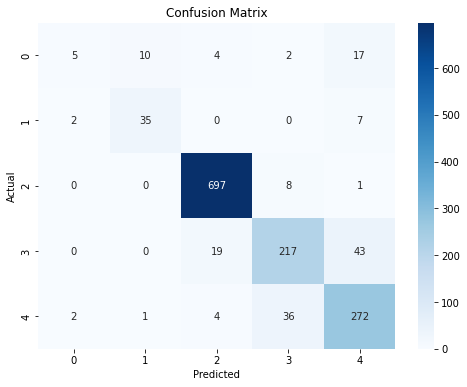

In [188]:
# Creating a confusion matrix for evaluation

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Predicting on Newer Players

In [189]:
# First we need to do some preprocessing to get the same features for the newer players we had for our model.

new_players = merged[merged['draftyear'].between(2018,2021)]

In [191]:
new_players['avg_points'] = new_players['points'] / new_players['games']
new_players['avg_rebounds'] = (new_players['off_reb'] + new_players['def_reb']) / new_players['games']

/var/folders/25/ys3kvvh94qz9hdnmxh9q884h0000gn/T/ipykernel_56763/3476384422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_players['avg_points'] = new_players['points'] / new_players['games']
/var/folders/25/ys3kvvh94qz9hdnmxh9q884h0000gn/T/ipykernel_56763/3476384422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_players['avg_rebounds'] = (new_players['off_reb'] + new_players['def_reb']) / new_players['games']


In [193]:
selected_features_new = ['points', 'tot_reb', 'ast', 'fgp', 'efg', 'PER', 'usg', 'OBPM', 'DBPM', 'BPM', 'fgm', 'WS', 'VORP', 'avg_points', 'avg_rebounds']

In [201]:
# Create a df with the new player's features

new_players_features_withna = new_players[selected_features_new]

In [202]:
# Replacing NaN with 0

new_players_features = new_players_features_withna.fillna(0)

In [203]:
# scaling new player features

new_players_features_scaled = scaler.transform(new_players_features)

In [204]:
# Using the model to predict probabilities

outcome_probabilities = model.predict_proba(new_players_features_scaled)

In [205]:
# Put results in a dataframe

results = pd.DataFrame(outcome_probabilities, columns=model.classes_)
results.insert(0, 'nbapersonid', new_players['nbapersonid'].values)

In [209]:
# Adding in player names in addition to id

results = results.merge(new_players[['nbapersonid', 'player']], on='nbapersonid', how='left')

In [211]:
# Deduplicating results

dedup = results.drop_duplicates(subset='nbapersonid')

In [213]:
# Making the results more readable
pd.options.display.float_format = '{:.2%}'.format

## A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background.

This model is a simple one for predicting future player performance. What it does is take into account some simple stats, like points per game, rebounds per game, and how a player does on offense and defense, and draws some relationships between those stats and players in the past who have found success in our league. From there, we use those same relationships to decide where players that are newer to the league are likely to top out at the peak of their career. This will help us make informed decisions about player development and their future role within the team.

## Strengths and weaknesses of model

My model has a variety of strengths and weaknesses. The first strength is its predictive power. I have leveraged historical data to predict future player success which is pretty cool. My model is also customizable, I can easily change the input features or the outcome buckets depending on the needs of our team. Finally, my model provides an objective data driven insight to player potential, so we can rely less on subjective evaluations.

In terms of weaknesses, the first is limited data. In order to create a more accurate model, we would want more data both for training and for testing. In addition, we have the assumption of similarity here. The NBA game changes often and what is important might change as well. Early career performance isn't always indicative of future outcomes. 

## Addressing weaknesses given more time.

More time and data always help us get to more accurate results. Given more time I would explore and assess different models to find the very best one. I would also include historical and longitudinal data as well as explore how external factors like injuries and coaching affect a player. Finally, I would implement regular model updates. 

## Visualization

Here we have a bar chart representing the possible career outcomes for different players. With more time I could make this interactive, but for now you can change the player just by changing the associated nbapersonid. 

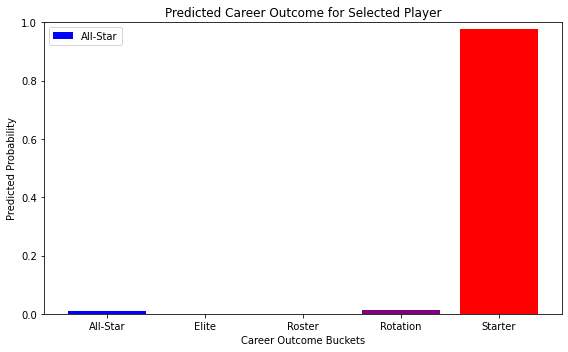

In [224]:
import matplotlib.pyplot as plt

# Choose a player (replace 'selected_player' with the actual player's name)
selected_player = 'Anthony Edwards'
selected_player = dedup[dedup['player'] == selected_player]

# Extract career outcome buckets and predicted probabilities
outcomes = ['All-Star', 'Elite', 'Roster', 'Rotation', 'Starter']
probabilities = selected_player[outcomes].values.tolist()[0]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(outcomes, probabilities, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.xlabel('Career Outcome Buckets')
plt.ylabel('Predicted Probability')
plt.title('Predicted Career Outcome for Selected Player')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization
plt.legend(['All-Star', 'Elite', 'Roster', 'Rotation', 'Starter'])
plt.tight_layout()


plt.show()


## Results for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.

In [215]:
# Establishing players
players = ['Shai Gilgeous-Alexander', 'Zion Williamson', 'James Wiseman', 'Josh Giddey']

In [217]:
# Filter the deduplicated results for the specific players
specific_results = dedup.loc[dedup['player'].isin(players)]

In [218]:
# Set the display format for float values
pd.options.display.float_format = '{:.2%}'.format

In [219]:
# Checking out the results for the specific players we are interested in
specific_results

,nbapersonid,All-Star,Elite,Roster,Rotation,Starter,player
133,1628983,0.40%,0.01%,0.00%,9.95%,89.64%,Shai Gilgeous-Alexander
664,1629627,0.03%,0.01%,98.84%,1.10%,0.02%,Zion Williamson
1152,1630164,0.08%,0.00%,82.58%,16.13%,1.20%,James Wiseman
2270,1630581,2.77%,0.03%,0.00%,8.72%,88.48%,Josh Giddey


## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [226]:
# Filter data for OKC and games 1-80
okc_data = rebounding_data[(rebounding_data['team'] == 'OKC') & (rebounding_data['game_number'] <= 80)]

# Calculate total offensive rebounds and total offensive rebound chances
total_offensive_rebounds = okc_data['offensive_rebounds'].sum()
total_off_rebound_chances = okc_data['off_rebound_chances'].sum()

# Calculate predicted offensive rebound percent
predicted_off_rebound_pct = total_offensive_rebounds / total_off_rebound_chances

print("Predicted Offensive Rebound Percent for Game 81:", predicted_off_rebound_pct)

Predicted Offensive Rebound Percent for Game 81: 0.288689755388714


<strong><span style="color:red">ANSWER 1:</span></strong>  

28.9% 

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong>  

With teams I have worked with in the past we will create dashboards to represent specific lineups. That way you can see game averages for the specific 5 players that are on the floor at any given time, in this scenario, we would just remove the player who is the good offensive rebounder from the dashboard. In addition, we could focus more on player level analysis and metrics rather than team metrics to account for injuries. Finally, we could look into who the opponent we are going against. How did we do against them last time? This may help inform our process. 

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3:</span></strong>  

As discussed a bit in question 2, who the opponent is will have a large impact on our offensive rebounding capabilities. If our opponent struggles with defensive rebounding, we might have more offensive rebounds and vice versa. One way to account for this is to investigate how we have performed against specific opponents in the past, including accounting for injuries in their specific lineups. 

Pace of play and game dynamics can have a huge impact on rebounding as well. To mitigate error here, we could segment games into different scenarios including close games, blowouts, etc. We can calculate offensive rebounding averages for each scenario, this would help provide a more nuanced prediction. 

Home/away games, player rotations, referees, and many other factors could play a role here as well. 